# Imports and set up

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

from sequene_preprocessing import categorize_sequences, add_sequence_features, validate_sequences
from vizualize_sequence_validity import plot_sequence_validity, plot_invalid_categories

GLOBAL_INPUT_DATA_DIR = '/home/dreamtim/Coding/ITMO/itmo-cpp/input_data'
OUTPUT_DATA_DIR = 'output'

# Data loading

In [7]:
peptides_df = pd.read_csv(os.path.join(GLOBAL_INPUT_DATA_DIR, 'peptides.csv'))
peptides_df.head()

,Unnamed: 0,id,sequence,extra_name,cpp_category,is_cpp,cpp_type,origin,id_uptake,peptide,...,raw_time,method,cell_line,cargo,mechanism,raw_temperature,id_article,doi,pubmed_id,title
0,0,2721,(Acp)-KKKKKRFSFKKSFKLSGFSFKKNKK,NaN,NaN,True,NaN,NaN,938.0,2721.0,...,1h,Fluorescent Microscopy,HSC-T6,FITC,NaN,37ºC,NaN,NaN,NaN,NaN
1,3,2724,(Acp)-RKRRQTSMTDFYHSKRRLIFS,NaN,NaN,True,NaN,NaN,969.0,2724.0,...,1h,Fluorescent Microscopy,HeLa cells,FITC,NaN,NaN,NaN,NaN,NaN,NaN
2,7,2761,(biotin)-lclrpvgggweaklakalakalakhlakalakalkacea,NaN,NaN,True,NaN,NaN,1113.0,2761.0,...,4h,Fluorescent Microscopy,ARPE-19 cells,Cx43AsODN),NaN,37ºC,NaN,NaN,NaN,NaN
3,8,2762,(biotin)-lclrpvggrsqsrsryyrqrqrsrrrrrrs,NaN,NaN,True,NaN,NaN,1114.0,2762.0,...,4h,Fluorescent Microscopy,ARPE-19 cells,Cx43AsODN),NaN,37ºC,NaN,NaN,NaN,NaN
4,9,2630,?A-RR-[KRRRRRE],NaN,NaN,True,NaN,NaN,720.0,2630.0,...,NaN,Flow cytometry,HeLa cells,FITC,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
assert peptides_df.sequence.nunique() == len(peptides_df)

# Sequence preprocessing

In [9]:
final_peptides_df = (peptides_df
    .pipe(categorize_sequences)
    .pipe(add_sequence_features)
    .pipe(validate_sequences)
)

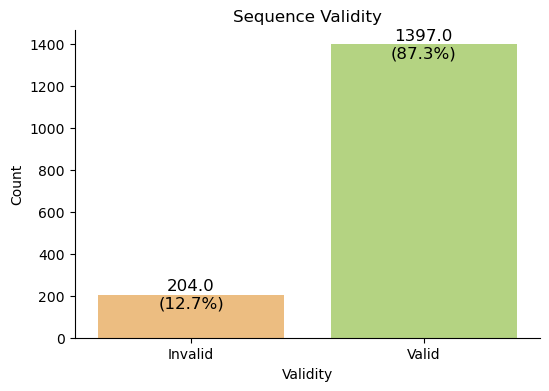

In [11]:
plot_sequence_validity(final_peptides_df)
plt.show()